## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   3.675946  1737.242555  0.863975  6.724038  1.565957
1  33.144014   868.504460  0.661523  2.679418  1.591871
2  89.112438   301.139807  0.702821  9.097512  1.264865
3  53.411506   631.165132  0.279073  7.152705  1.257889
4  65.595478  1120.134298  0.040914  9.166976  0.717907


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0682651	total: 57.3ms	remaining: 57.2s
1:	learn: 1.0591345	total: 58ms	remaining: 28.9s
2:	learn: 1.0492217	total: 58.5ms	remaining: 19.4s
3:	learn: 1.0381036	total: 59.1ms	remaining: 14.7s
4:	learn: 1.0263408	total: 59.6ms	remaining: 11.9s
5:	learn: 1.0141890	total: 60.2ms	remaining: 9.97s
6:	learn: 1.0023192	total: 60.6ms	remaining: 8.6s
7:	learn: 0.9903089	total: 61.1ms	remaining: 7.58s
8:	learn: 0.9780638	total: 61.6ms	remaining: 6.79s
9:	learn: 0.9661994	total: 62.1ms	remaining: 6.15s
10:	learn: 0.9577083	total: 62.6ms	remaining: 5.63s
11:	learn: 0.9471056	total: 63ms	remaining: 5.18s
12:	learn: 0.9381070	total: 63.4ms	remaining: 4.81s
13:	learn: 0.9275600	total: 63.8ms	remaining: 4.49s
14:	learn: 0.9153517	total: 64.3ms	remaining: 4.22s
15:	learn: 0.9067001	total: 64.8ms	remaining: 3.99s
16:	learn: 0.8964293	total: 65.3ms	remaining: 3.77s
17:	learn: 0.8862967	total: 65.6ms	remaining: 3.58s
18:	learn: 0.8770264	total: 66.1ms	remaining: 3.4

102:	learn: 0.4237225	total: 105ms	remaining: 917ms
103:	learn: 0.4208397	total: 106ms	remaining: 911ms
104:	learn: 0.4177852	total: 106ms	remaining: 906ms
105:	learn: 0.4146637	total: 107ms	remaining: 900ms
106:	learn: 0.4121539	total: 107ms	remaining: 894ms
107:	learn: 0.4094562	total: 108ms	remaining: 888ms
108:	learn: 0.4064302	total: 108ms	remaining: 883ms
109:	learn: 0.4034623	total: 108ms	remaining: 876ms
110:	learn: 0.4005569	total: 109ms	remaining: 869ms
111:	learn: 0.3980262	total: 109ms	remaining: 865ms
112:	learn: 0.3954612	total: 110ms	remaining: 860ms
113:	learn: 0.3927005	total: 110ms	remaining: 855ms
114:	learn: 0.3905639	total: 110ms	remaining: 850ms
115:	learn: 0.3879450	total: 111ms	remaining: 845ms
116:	learn: 0.3857423	total: 111ms	remaining: 840ms
117:	learn: 0.3831265	total: 112ms	remaining: 837ms
118:	learn: 0.3808174	total: 112ms	remaining: 833ms
119:	learn: 0.3783848	total: 113ms	remaining: 829ms
120:	learn: 0.3757847	total: 114ms	remaining: 825ms
121:	learn: 

277:	learn: 0.1785218	total: 185ms	remaining: 482ms
278:	learn: 0.1780330	total: 186ms	remaining: 481ms
279:	learn: 0.1773384	total: 186ms	remaining: 479ms
280:	learn: 0.1767063	total: 187ms	remaining: 478ms
281:	learn: 0.1762402	total: 187ms	remaining: 476ms
282:	learn: 0.1753292	total: 188ms	remaining: 475ms
283:	learn: 0.1747015	total: 188ms	remaining: 474ms
284:	learn: 0.1742752	total: 189ms	remaining: 473ms
285:	learn: 0.1736588	total: 189ms	remaining: 472ms
286:	learn: 0.1729862	total: 189ms	remaining: 471ms
287:	learn: 0.1722271	total: 190ms	remaining: 469ms
288:	learn: 0.1717567	total: 190ms	remaining: 468ms
289:	learn: 0.1713807	total: 191ms	remaining: 466ms
290:	learn: 0.1710091	total: 191ms	remaining: 465ms
291:	learn: 0.1706517	total: 192ms	remaining: 465ms
292:	learn: 0.1700522	total: 192ms	remaining: 464ms
293:	learn: 0.1697415	total: 193ms	remaining: 462ms
294:	learn: 0.1687790	total: 193ms	remaining: 461ms
295:	learn: 0.1683440	total: 193ms	remaining: 460ms
296:	learn: 

499:	learn: 0.0849413	total: 288ms	remaining: 288ms
500:	learn: 0.0845158	total: 289ms	remaining: 287ms
501:	learn: 0.0844663	total: 289ms	remaining: 287ms
502:	learn: 0.0840611	total: 289ms	remaining: 286ms
503:	learn: 0.0840125	total: 290ms	remaining: 285ms
504:	learn: 0.0839645	total: 290ms	remaining: 284ms
505:	learn: 0.0835191	total: 291ms	remaining: 284ms
506:	learn: 0.0831129	total: 291ms	remaining: 283ms
507:	learn: 0.0830654	total: 292ms	remaining: 282ms
508:	learn: 0.0827740	total: 292ms	remaining: 282ms
509:	learn: 0.0823708	total: 293ms	remaining: 281ms
510:	learn: 0.0822861	total: 293ms	remaining: 280ms
511:	learn: 0.0822396	total: 293ms	remaining: 280ms
512:	learn: 0.0818433	total: 294ms	remaining: 279ms
513:	learn: 0.0814223	total: 294ms	remaining: 278ms
514:	learn: 0.0813763	total: 295ms	remaining: 278ms
515:	learn: 0.0809893	total: 295ms	remaining: 277ms
516:	learn: 0.0809437	total: 296ms	remaining: 276ms
517:	learn: 0.0805621	total: 296ms	remaining: 276ms
518:	learn: 

672:	learn: 0.0544174	total: 368ms	remaining: 179ms
673:	learn: 0.0542279	total: 369ms	remaining: 178ms
674:	learn: 0.0540164	total: 369ms	remaining: 178ms
675:	learn: 0.0537685	total: 370ms	remaining: 177ms
676:	learn: 0.0535582	total: 371ms	remaining: 177ms
677:	learn: 0.0533193	total: 371ms	remaining: 176ms
678:	learn: 0.0532560	total: 371ms	remaining: 176ms
679:	learn: 0.0531942	total: 372ms	remaining: 175ms
680:	learn: 0.0529525	total: 372ms	remaining: 174ms
681:	learn: 0.0527455	total: 373ms	remaining: 174ms
682:	learn: 0.0525362	total: 373ms	remaining: 173ms
683:	learn: 0.0523678	total: 374ms	remaining: 173ms
684:	learn: 0.0523399	total: 374ms	remaining: 172ms
685:	learn: 0.0521542	total: 375ms	remaining: 171ms
686:	learn: 0.0520943	total: 375ms	remaining: 171ms
687:	learn: 0.0519293	total: 376ms	remaining: 170ms
688:	learn: 0.0519018	total: 376ms	remaining: 170ms
689:	learn: 0.0517024	total: 376ms	remaining: 169ms
690:	learn: 0.0514740	total: 377ms	remaining: 169ms
691:	learn: 

889:	learn: 0.0306341	total: 471ms	remaining: 58.2ms
890:	learn: 0.0306041	total: 471ms	remaining: 57.7ms
891:	learn: 0.0304462	total: 472ms	remaining: 57.1ms
892:	learn: 0.0303615	total: 472ms	remaining: 56.6ms
893:	learn: 0.0303406	total: 473ms	remaining: 56ms
894:	learn: 0.0302070	total: 473ms	remaining: 55.5ms
895:	learn: 0.0301863	total: 474ms	remaining: 55ms
896:	learn: 0.0300558	total: 474ms	remaining: 54.4ms
897:	learn: 0.0299294	total: 474ms	remaining: 53.9ms
898:	learn: 0.0299182	total: 475ms	remaining: 53.3ms
899:	learn: 0.0298891	total: 475ms	remaining: 52.8ms
900:	learn: 0.0297611	total: 475ms	remaining: 52.2ms
901:	learn: 0.0297411	total: 476ms	remaining: 51.7ms
902:	learn: 0.0295994	total: 476ms	remaining: 51.2ms
903:	learn: 0.0295093	total: 477ms	remaining: 50.6ms
904:	learn: 0.0294903	total: 477ms	remaining: 50.1ms
905:	learn: 0.0294795	total: 478ms	remaining: 49.5ms
906:	learn: 0.0293907	total: 478ms	remaining: 49ms
907:	learn: 0.0293800	total: 478ms	remaining: 48.5ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


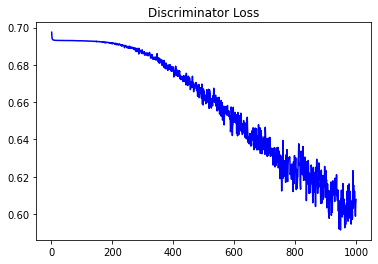

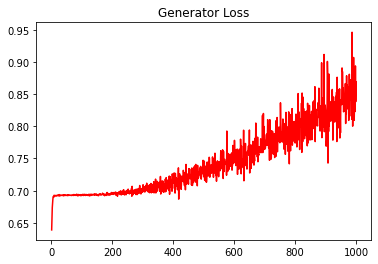

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2126359932228921


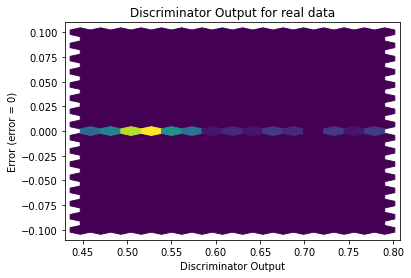

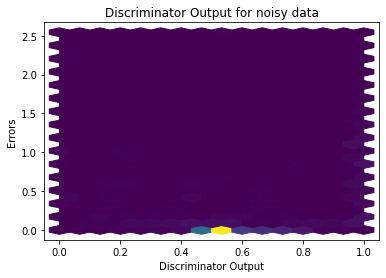

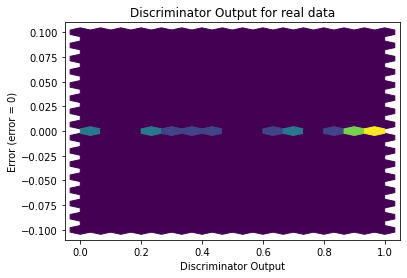

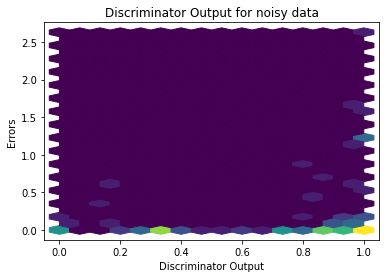

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
